## Usage page figures

Generates the figures shown in the usage page of the docs.

In [1]:
import sys
sys.path.append('../')
import os
#os.environ["CEBRA_DATADIR"] = "/data"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jl
import pathlib
import cebra.datasets
from cebra import CEBRA

from matplotlib.collections import LineCollection
import pandas as pd

CURRENT_DIR = os.getcwd()

In [2]:
# set grey axis for the following plots
from matplotlib import rcParams
rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['axes.labelcolor'] = 'grey'
rcParams['legend.labelcolor'] = 'black'
rcParams['legend.framealpha'] = 0.3
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.titlecolor'] = 'grey'

In [3]:
save_folder = pathlib.Path("../docs-imgs/")

In [4]:
hippocampus_pos = cebra.datasets.init('rat-hippocampus-single-achilles')
hippocampus_pos_2 = cebra.datasets.init('rat-hippocampus-single-buddy')

In [5]:
max_iterations = 15000 #default is 5000.
output_dimension = 32 #here, we set as a variable for hypothesis testing below.

In [6]:
cebra_posdir3_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [7]:
cebra_posdir3_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index.numpy())

pos:  0.1305 neg:  5.4246 total:  5.5552 temperature:  1.0000:  13%|█▎        | 1998/15000 [00:46<03:56, 54.88it/s]

In [ ]:
cebra_posdir3_model.save("model_3.pt")

In [4]:
cebra_posdir3_model = cebra.CEBRA.load("model_3.pt")

In [5]:
embedding = cebra_posdir3_model.transform(hippocampus_pos.neural)

## Embedding

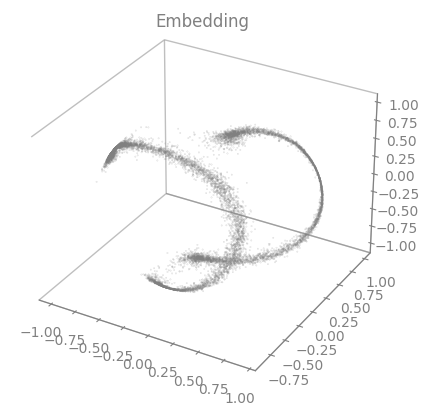

In [7]:
cebra.plot_embedding(embedding, grey_fig=True)
plt.savefig(save_folder / "default-embedding.png", transparent=True, dpi=300, bbox_inches="tight")

In [ ]:
cebra.plot_embedding(embedding, embedding_labels="darkorchid", grey_fig=True)
plt.savefig(save_folder / "dark_orchid-embedding.png", transparent=True, dpi=300, bbox_inches="tight")

In [ ]:
cebra.plot_embedding(embedding, embedding_labels="time", cmap="magma", markersize=5, alpha=0.5, grey_fig=True)
plt.savefig(save_folder / "time-embedding.png", transparent=True, dpi=300, bbox_inches="tight")

In [ ]:
cebra.plot_embedding(embedding, embedding_labels=hippocampus_pos.continuous_index.numpy()[:,0], grey_fig=True)
plt.savefig(save_folder / "auxiliary-embedding.png", transparent=True, dpi=300, bbox_inches="tight")

In [ ]:
cebra_posdir10_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=10,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

cebra_posdir10_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index.numpy())

In [ ]:
cebra_posdir10_model.save("model_10.pt")

In [9]:
cebra_posdir10_model = cebra.CEBRA.load("model_10.pt")

In [ ]:
embedding_10 = cebra_posdir10_model.transform(hippocampus_pos.neural)

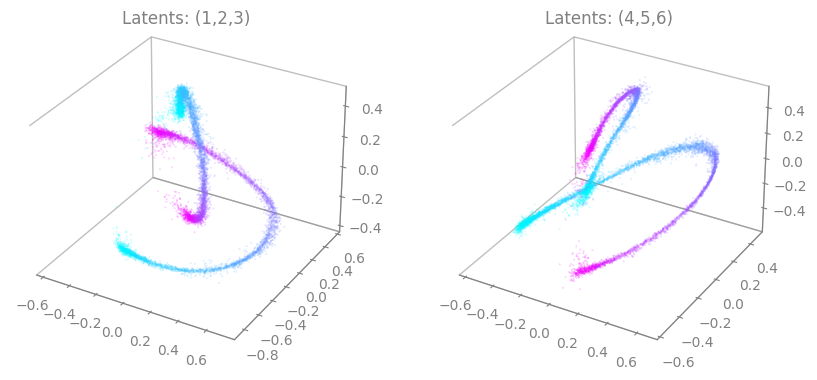

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122, projection="3d")

ax1 = cebra.plot_embedding(embedding_10, embedding_labels=hippocampus_pos.continuous_index.numpy()[:,0], idx_order=(1,2,3), title="Latents: (1,2,3)", ax=ax1, grey_fig=True)
ax2 = cebra.plot_embedding(embedding_10, embedding_labels=hippocampus_pos.continuous_index.numpy()[:,0], idx_order=(4,5,6), title="Latents: (4,5,6)", ax=ax2, grey_fig=True)

plt.savefig(save_folder / "reordered-embedding.png", transparent=True, dpi=300, bbox_inches="tight")

In [ ]:
# embedding with 2D
cebra_posdir2_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=2,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

cebra_posdir2_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index.numpy())

pos:  0.1094 neg:  5.4845 total:  5.5939 temperature:  1.0000: 100%|██████████| 15000/15000 [03:57<00:00, 63.21it/s]


CEBRA(batch_size=512, conditional='time_delta', max_iterations=15000,
      model_architecture='offset10-model', output_dimension=2, temperature=1,
      time_offsets=10, verbose=True)

In [ ]:
cebra_posdir2_model.save("model_2.pt")

In [ ]:
cebra_posdir2_model = cebra.CEBRA.load("model_2.pt")

In [ ]:
embedding_2 = cebra_posdir2_model.transform(hippocampus_pos.neural)

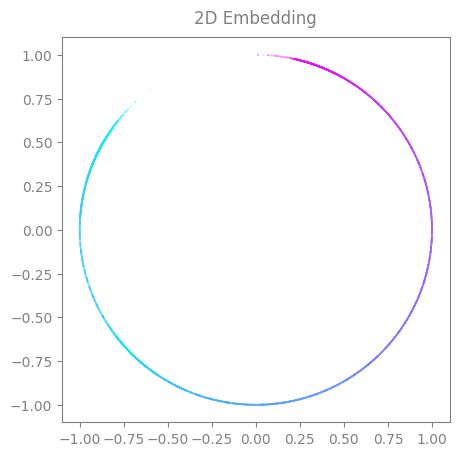

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax = cebra.plot_embedding(embedding_2, embedding_labels=hippocampus_pos.continuous_index.numpy()[:,0], title="2D Embedding", idx_order=(0,1), ax=ax, grey_fig=True)

plt.savefig(save_folder / "2D-embedding.png", transparent=True, dpi=300, bbox_inches="tight")

## Loss

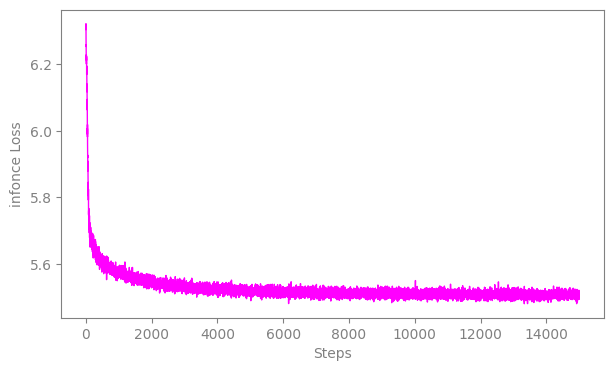

In [15]:
cebra.plot_loss(cebra_posdir3_model)
plt.savefig(save_folder / "default-loss.png", transparent=True, dpi=300, bbox_inches="tight")

## Temperature

In [ ]:
cebra_auto_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature_mode="auto",
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

cebra_auto_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index.numpy())

In [ ]:
cebra_auto_model.save("auto_model.pt")

In [16]:
cebra_auto_model = cebra.CEBRA.load("auto_model.pt")

In [17]:
embedding_auto = cebra_auto_model.transform(hippocampus_pos.neural)

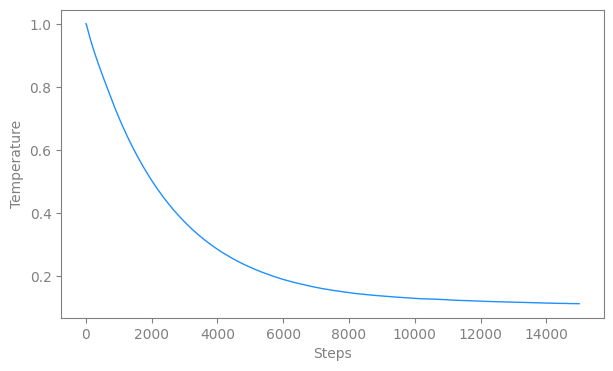

In [18]:
cebra.plot_temperature(cebra_auto_model)
plt.savefig(save_folder / "default-temperature.png", transparent=True, dpi=300, bbox_inches="tight")

# Compare models

In [ ]:
output_dimension = 32

In [6]:
cebra_posdir_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=output_dimension,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

cebra_pos_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=output_dimension,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

cebra_dir_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=output_dimension,
                        max_iterations=max_iterations,
                        distance='cosine',
                        device='cuda_if_available',
                        verbose=True)


cebra_posdir_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index)
cebra_posdir_model.save("cebra_posdir_model.pt")

cebra_pos_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index.numpy()[:,0])
cebra_pos_model.save("cebra_pos_model.pt")

cebra_dir_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index.numpy()[:,1])
cebra_dir_model.save("cebra_dir_model.pt")

pos:  0.0914 neg:  5.3876 total:  5.4790 temperature:  1.0000: 100%|██████████| 15000/15000 [05:13<00:00, 47.81it/s]
pos:  0.1280 neg:  5.4544 total:  5.5824 temperature:  1.0000: 100%|██████████| 15000/15000 [05:11<00:00, 48.12it/s]
pos:  0.0482 neg:  5.5991 total:  5.6473 temperature:  1.0000: 100%|██████████| 15000/15000 [05:14<00:00, 47.64it/s]


In [5]:
cebra_posdir_model = cebra.CEBRA.load("cebra_posdir_model.pt")
cebra_pos_model = cebra.CEBRA.load("cebra_pos_model.pt")
cebra_dir_model = cebra.CEBRA.load("cebra_dir_model.pt")

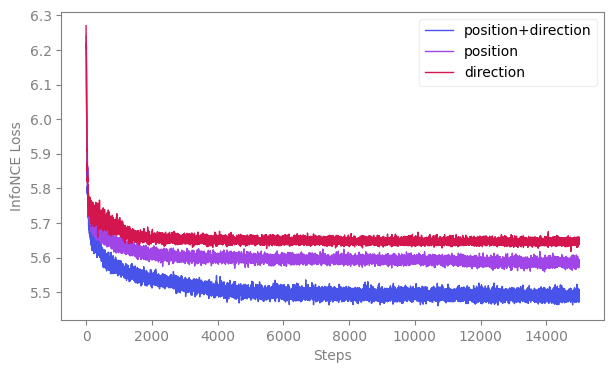

In [6]:
cebra.compare_models([cebra_posdir_model, cebra_pos_model, cebra_dir_model], labels=["position+direction", "position", "direction"])
plt.savefig(save_folder / "default-comparison.png", transparent=True, dpi=300, bbox_inches="tight")

## Plot consistency scores

In [17]:
cebra_model = CEBRA(model_architecture='offset10-model',
                    batch_size=512,
                    learning_rate=3e-4,
                    temperature=1,
                    output_dimension=3,
                    max_iterations=max_iterations,
                    distance='cosine',
                    conditional='time_delta',
                    device='cuda_if_available',
                    verbose=True,
                    time_offsets=10)

In [8]:
cebra_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index[:,0])
cebra_model.save("achilles_1.pt")

cebra_model.fit(hippocampus_pos_2.neural, hippocampus_pos_2.continuous_index[:,0])
cebra_model.save("buddy_1.pt")

# second run on the same datasets
cebra_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index[:,0])
cebra_model.save("achilles_2.pt")

cebra_model.fit(hippocampus_pos_2.neural, hippocampus_pos_2.continuous_index[:,0])
cebra_model.save("buddy_2.pt")

# third run on the same datasets
cebra_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index[:,0])
cebra_model.save("achilles_3.pt")

cebra_model.fit(hippocampus_pos_2.neural, hippocampus_pos_2.continuous_index[:,0])
cebra_model.save("buddy_3.pt")

pos:  0.1232 neg:  5.4566 total:  5.5798 temperature:  1.0000: 100%|██████████| 15000/15000 [05:22<00:00, 46.56it/s]
pos:  0.2982 neg:  5.4756 total:  5.7738 temperature:  1.0000: 100%|██████████| 15000/15000 [05:11<00:00, 48.16it/s]
pos:  0.1342 neg:  5.4581 total:  5.5922 temperature:  1.0000: 100%|██████████| 15000/15000 [04:44<00:00, 52.76it/s]
pos:  0.3314 neg:  5.4884 total:  5.8198 temperature:  1.0000: 100%|██████████| 15000/15000 [03:58<00:00, 62.84it/s]


In [6]:
achilles_1 = cebra.CEBRA.load("achilles_1.pt")
embedding1 = achilles_1.transform(hippocampus_pos.neural)

buddy_1 = cebra.CEBRA.load("buddy_1.pt")
embedding2 = buddy_1.transform(hippocampus_pos_2.neural)

achilles_2 = cebra.CEBRA.load("achilles_2.pt")
embedding3 = achilles_2.transform(hippocampus_pos.neural)

buddy_2 = cebra.CEBRA.load("buddy_2.pt")
embedding4 = buddy_2.transform(hippocampus_pos_2.neural)

achilles_3 = cebra.CEBRA.load("achilles_3.pt")
embedding5 = achilles_3.transform(hippocampus_pos.neural)

buddy_3 = cebra.CEBRA.load("buddy_3.pt")
embedding6 = buddy_3.transform(hippocampus_pos_2.neural)

embeddings = [embedding1, embedding2, embedding3,
              embedding4, embedding5, embedding6]
dataset_ids = ["achilles", "buddy", "achilles", "buddy", "achilles", "buddy"]
labels = [hippocampus_pos.continuous_index[:, 0], hippocampus_pos_2.continuous_index[:, 0], hippocampus_pos.continuous_index[:, 0],
          hippocampus_pos_2.continuous_index[:, 0], hippocampus_pos.continuous_index[:, 0], hippocampus_pos_2.continuous_index[:, 0]]


In [7]:
# Between-runs, with dataset IDs (optional)
scores_runs, pairs_runs, datasets_runs = cebra.sklearn.metrics.consistency_score(embeddings=embeddings,
                                                                  dataset_ids=dataset_ids,
                                                                  between="runs")

assert scores_runs.shape == (6, ) 
assert pairs_runs.shape == (2, 6, 2)
assert datasets_runs.shape == (2, )

# Between-datasets, by aligning on the labels
scores_datasets, pairs_datasets, datasets_datasets = cebra.sklearn.metrics.consistency_score(embeddings=embeddings,
                                                                  labels=labels,
                                                                  dataset_ids=dataset_ids,
                                                                  between="datasets")
# similar pairs are averaged together
assert scores_datasets.shape == (2, )  # (session1-session2, session2-session1)
assert pairs_datasets.shape == (18, 2)
assert datasets_datasets.shape == (2, )

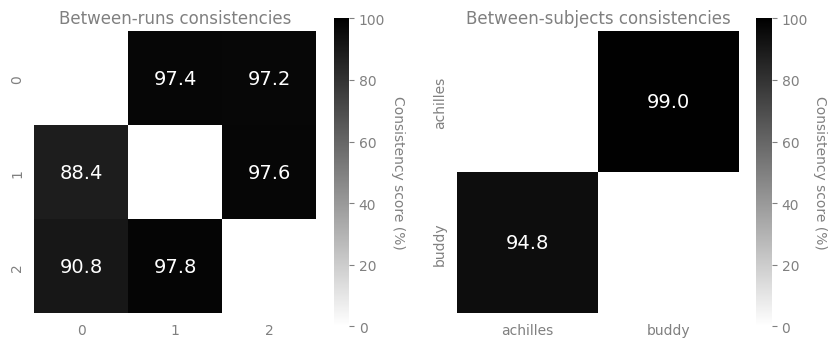

In [9]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1 = cebra.plot_consistency(scores_runs, pairs_runs, datasets_runs, vmin=0, vmax=100, ax=ax1, title="Between-runs consistencies")
ax2 = cebra.plot_consistency(scores_datasets, pairs_datasets, datasets_datasets, vmin=0, vmax=100, ax=ax2, title="Between-subjects consistencies")

plt.savefig(save_folder / "consistency-score.png", transparent=True, dpi=300, bbox_inches="tight")